In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pesurrcampusmihackathoncompetitiona/sample_submission.csv
/kaggle/input/pesurrcampusmihackathoncompetitiona/train.csv
/kaggle/input/pesurrcampusmihackathoncompetitiona/test.csv


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv("/kaggle/input/pesurrcampusmihackathoncompetitiona/train.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [27]:
data_types=data.dtypes
print(data_types)
#we first check all the datatypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           


# Visualisation

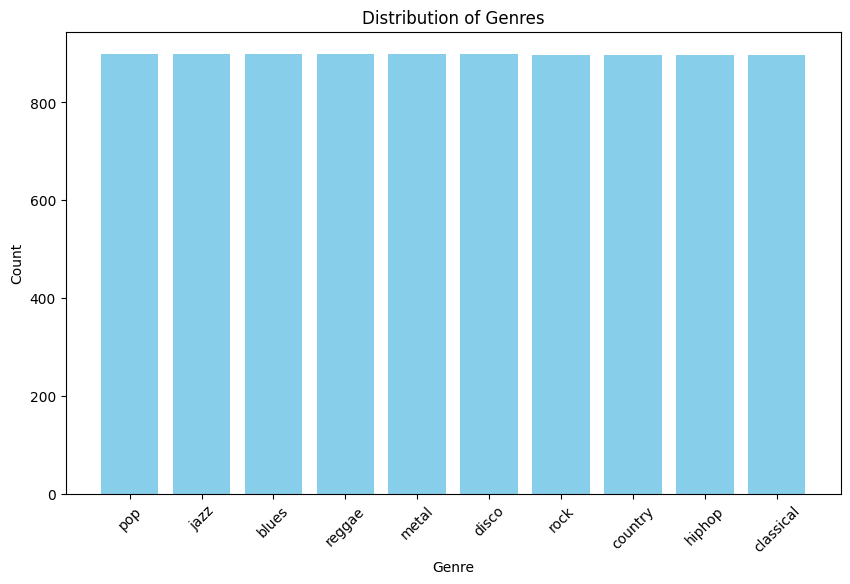

In [28]:

# Count the occurrences of each genre
genre_counts = data['label'].value_counts()

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

As we can see from the above graph there is no class imbalance in target label

#  Pre-Processing

In [29]:
missing_values = data.isna().sum()
print(missing_values)

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

we see that there are no missing values

In [30]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [31]:
X = data.iloc[:, 2:-1]  #selecting all features except filename,length and target
y = data['label']  # we select 'label' column as the target variable

In [32]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) #assigning a unique integer to each unique label

In [33]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#We standardize the features to ensure everything is on same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Reshaping data to allow LSTM to process data in sequential manner
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# ANN model

In [36]:

X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)
# One-hot encode the labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Building a simple ANN model
ann_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')#softmax for multiclass classification of probability
])

# Compiling the model, optimiser as adam
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
180/180 [==============================] - 1s 3ms/step - loss: 1.3916 - accuracy: 0.5048 - val_loss: 0.9770 - val_accuracy: 0.6650
Epoch 2/10
180/180 [==============================] - 0s 2ms/step - loss: 0.8826 - accuracy: 0.6981 - val_loss: 0.7819 - val_accuracy: 0.7401
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.7549 - val_loss: 0.6856 - val_accuracy: 0.7609
Epoch 4/10
180/180 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.7935 - val_loss: 0.6631 - val_accuracy: 0.7825
Epoch 5/10
180/180 [==============================] - 1s 3ms/step - loss: 0.5375 - accuracy: 0.8145 - val_loss: 0.5837 - val_accuracy: 0.8096
Epoch 6/10
180/180 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.8413 - val_loss: 0.5804 - val_accuracy: 0.8068
Epoch 7/10
180/180 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8599 - val_loss: 0.5247 - val_accuracy: 0.8249
Epoch 

In [37]:
# Evaluate the model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test_encoded)
print("ANN Accuracy: {:.2f}%".format(ann_accuracy * 100))

57/57 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.8232
ANN Accuracy: 82.32%


# RNN Model

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Reshape data for RNN (assuming you want to use a simple RNN)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# Building a simple RNN model
rnn_model = keras.Sequential([
    keras.layers.SimpleRNN(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compiling the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
rnn_model.fit(X_train, y_train, epochs=14, batch_size=32, validation_split=0.2)



Epoch 1/14
180/180 [==============================] - 2s 5ms/step - loss: 1.2608 - accuracy: 0.5597 - val_loss: 0.8940 - val_accuracy: 0.6671
Epoch 2/14
180/180 [==============================] - 1s 4ms/step - loss: 0.7731 - accuracy: 0.7274 - val_loss: 0.6984 - val_accuracy: 0.7644
Epoch 3/14
180/180 [==============================] - 1s 4ms/step - loss: 0.5886 - accuracy: 0.7991 - val_loss: 0.6331 - val_accuracy: 0.7818
Epoch 4/14
180/180 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8340 - val_loss: 0.5592 - val_accuracy: 0.8110
Epoch 5/14
180/180 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.8599 - val_loss: 0.5457 - val_accuracy: 0.8207
Epoch 6/14
180/180 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.8954 - val_loss: 0.4920 - val_accuracy: 0.8457
Epoch 7/14
180/180 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.9162 - val_loss: 0.4679 - val_accuracy: 0.8429
Epoch 

In [39]:
# Evaluating the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print("RNN Accuracy: {:.2f}%".format(rnn_accuracy * 100))

57/57 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.8683
RNN Accuracy: 86.83%


# LSTM Model


In [40]:
# Building the LSTM model
#lstm_model = keras.Sequential([
    #keras.layers.LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    #keras.layers.LSTM(128, activation='relu', return_sequences=True),
    #keras.layers.LSTM(64, activation='sigmoid'),
    #keras.layers.Dense(len(np.unique(y)), activation='softmax')
#])

#lstm_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
#lstm_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

In [41]:

# Model Evaluation
#lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
#print("LSTM Accuracy: {:.2f}%".format(lstm_accuracy * 100))
#giving accuracy 87.29%

# Weighted KNN

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset and perform data preprocessing
data = pd.read_csv('/kaggle/input/pesurrcampusmihackathoncompetitiona/train.csv')  # Replace with the actual file name

# Extract features and labels
X = data.iloc[:, 2:-1]  # Assuming the features start from the third column
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a k-NN classifier with weighted voting
knn_classifier = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='manhattan')  # Adjust parameters

# Train the k-NN model
knn_classifier.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_classifier.predict(X_test)


In [43]:
# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Weighted k-NN Accuracy: {:.2f}%".format(knn_accuracy * 100))

Weighted k-NN Accuracy: 91.94%


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Loading the test dataset
test_data = pd.read_csv('/kaggle/input/pesurrcampusmihackathoncompetitiona/test.csv')

# Extracting the 'id' column from the test dataset
test_ids = test_data['id']

# Remove the 'id' and 'length' columns from the test dataset
test_data = test_data.drop(columns=['id', 'length'])

# Data preprocessing for the test dataset
X_test = test_data

# Standardize the features using the same scaler used for training data
X_test = scaler.transform(X_test)


In [45]:
# Make predictions using the k-NN classifier
knn_predictions = knn_classifier.predict(X_test)

# Create a DataFrame with ID and Label columns
result_df = pd.DataFrame({'id': test_ids, 'label': knn_predictions})

# Saving the DataFrame to a CSV file
result_df.to_csv('submission.csv', index=False)